# Seismic reflection/transmission coefficients based on Aki & Richards

The code below is a copy of the matlab notebook by Charles J. Ammon: https://sites.psu.edu/charlesammon/2017/01/19/seismic-reflectiontransmission-coefficients-with-matlab/. We checked that it produces the same results. His notebook includes the following description:<br>
*A common computation in seismology is the calculation of reflection and transmission coefficients that describe the partitioning of energy when a seismic wave strikes a boundary between elastic materials. The coefficients depend on the seismic wave speeds and densities on either side of the boundary and on the incident wave horizontal slowness, or ray parameter. The formulas for the values can be found in equations 5.38 and 5.39 of Aki and Richards (1980). For a welded elastic boundary, an incident P wave results in four waves, two reflected and two transmitted or refracted waves. Thus for each case we need four coefficients – notation for each is illustrated in the figure below.*



In [69]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

In [70]:
#     Vp   Vs   Density
mt = [3.459, 1.89075, 2.7525 ];  # mt is the half space with transmitted waves
mi = [3.5, 2.0, 2.46];  # mi is the half space with incident wave
#mt = [8.0, 4.6, 3.38];  # mt is the half space with transmitted waves
#mi = [4.98, 2.9, 2.667];  # mi is the half space with incident wave

# generate the ray parameter array
# the value goes from 0 to 1/Vp(incident)

n  = 200
p  = np.arange(0,n+1)*(1/mi[0])/n;


In [71]:
# vertical slownesses
etaai,etaat,etabi,etabt = [],[],[],[]
a,b,c,d = [],[],[],[]
Rpp,Rps,Tpp,Tps = [],[],[],[]
for pn in range(len(p)):
    #-------------------------------------------------------------------------
    etaai_val = cmath.sqrt(1/(mi[0]*mi[0]) - p[pn]**2)
    etaat_val = cmath.sqrt(1/(mt[0]*mt[0]) - p[pn]**2)
    etabi_val = cmath.sqrt(1/(mi[1]*mi[1]) - p[pn]**2)
    etabt_val = cmath.sqrt(1/(mt[1]*mt[1]) - p[pn]**2)
    etaai.append(etaai_val)
    etaat.append(etaat_val)
    etabi.append(etabi_val)
    etabt.append(etabt_val)
    
    #-------------------------------------------------------------------------
    a_val = mt[2]*(1-2*mt[1]*mt[1]*p[pn]**2)-mi[2]*(1-2*mi[1]*mi[1]*p[pn]**2)
    b_val = mt[2]*(1-2*mt[1]*mt[1]*p[pn]**2)+2*mi[2]*mi[1]*mi[1]*p[pn]**2
    c_val = mi[2]*(1-2*mi[1]*mi[1]*p[pn]**2)+2*mt[2]*mt[1]*mt[1]*p[pn]**2
    d     = 2*(mt[2]*mt[1]*mt[1]-mi[2]*mi[1]*mi[1])
    a.append(a_val)
    b.append(b_val)
    c.append(c_val)
    
    #-------------------------------------------------------------------------
    E = b_val * etaai_val + c_val * etaat_val
    F = b_val * etabi_val + c_val * etabt_val
    G = a_val - d * etaai_val *etabt_val
    H = a_val - d * etaat_val *etabi_val
    D = E*F+G*H*p[pn]**2
    
    #-------------------------------------------------------------------------
    Rpp_val = ( (b_val*etaai_val-c_val*etaat_val)*F - (a_val + d*etaai_val*etabt_val)*H*p[pn]**2)/D
    Rps_val = -(2 * etaai_val * (a_val* b_val + d * c_val* etaat_val* etabt_val) * p[pn] * mi[0]/mi[1] )/D
    Tpp_val    =  (2*mi[2]*etaai_val*F*(mi[0]/mt[0]))/D
    Tps_val     =  (2*mi[2]*etaai_val*H*p[pn]*(mi[0]/mt[1]))/D

    Rpp.append(Rpp_val)
    Rps.append(Rps_val)
    Tpp.append(Tpp_val)
    Tps.append(Tps_val)

In [72]:
angle = []
for k in range(len(p)):
    angle_val = (180/math.pi)*(math.asin(p[k]*mi[0]))
    angle.append(angle_val)
    #print('%d %f %f %f %f %f'%(k,angle[k],Rpp[k],Rps[k],Tpp[k],Tps[k]))

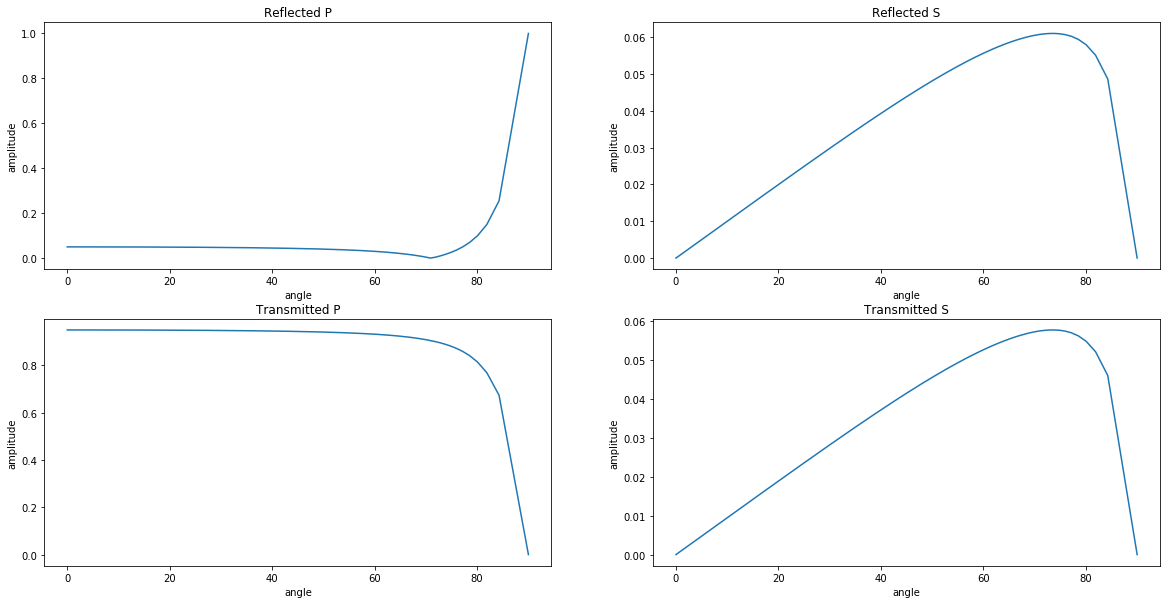

In [73]:
fig = plt.figure(figsize=(20,10))

Rpp=np.absolute(Rpp)
Rps=np.absolute(Rps)
Tpp=np.absolute(Tpp)
Tps=np.absolute(Tps)

plt.subplot(2,2,1)
plt.plot(angle,Rpp)
plt.title('Reflected P')
plt.xlabel('angle')
plt.ylabel('amplitude')

plt.subplot(2,2,2)
plt.plot(angle,Rps)
plt.title('Reflected S')
plt.xlabel('angle')
plt.ylabel('amplitude')

plt.subplot(2,2,3)
plt.plot(angle,Tpp)
plt.title('Transmitted P')
plt.xlabel('angle')
plt.ylabel('amplitude')

plt.subplot(2,2,4)
plt.plot(angle,Tps)
plt.title('Transmitted S')
plt.xlabel('angle')
plt.ylabel('amplitude')
plt.show()